In [8]:
import scvelo as scv
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import scanpy as sc
import igraph
import scvelo as scv
import loompy as lmp
import anndata
import os
import re
scv.set_figure_params(style="scvelo")
pl.rcParams["figure.figsize"] = (10,10)
Colorss=["#E41A1C","#377EB8","#4DAF4A","#984EA3","#FF7F00","#FFFF33","#A65628","#F781BF"]
#velocyto run10x /Volumes/Extreme\ Pro/D16_boost/ Users/fayzan/Downloads/refdata-gex-GRCh38-2020-A/genes/genes.gtf
#Manually subset on pruned cells
#Chromosomes need to be relabeled. GRCH38 remove, seperate mice cells

In [9]:
adata_16boost = scv.read('/Users/fayzan/PycharmProjects/Betel/Velocity/velocyto_day16boost/D16_boost.loom')
adata_16boostplus = scv.read('/Users/fayzan/PycharmProjects/Betel/Velocity/velocyto_day16boostplus/D16_boostplus.loom')
adata_25boost = scv.read('/Users/fayzan/PycharmProjects/Betel/Velocity/velocyto_day25boost/D25_boost.loom')
adata_25boostplus = scv.read('/Users/fayzan/PycharmProjects/Betel/Velocity/velocyto_day25boostplus/D25_boostplus.loom')
adata_40boost = scv.read('/Users/fayzan/PycharmProjects/Betel/Velocity/velocyto_day40boost/D40_boost.loom')
adata_40boostplus = scv.read('/Users/fayzan/PycharmProjects/Betel/Velocity/velocyto_day40boostplus/D40_boostplus.loom')

/Users/fayzan/PycharmProjects/Betel/venv/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/fayzan/PycharmProjects/Betel/venv/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/fayzan/PycharmProjects/Betel/venv/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/fayzan/PycharmProjects/Betel/venv/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/fayzan/PycharmProjects/Betel/venv/lib/python3.8/site-packages

In [10]:
#Merge all velocyto files and then subset the cells. Then merge info.
adata_16boost.obs['newid'] = adata_16boost.obs.index
adata_16boostplus.obs['newid'] = adata_16boostplus.obs.index
adata_25boost.obs['newid'] = adata_25boost.obs.index
adata_25boostplus.obs['newid'] = adata_25boostplus.obs.index
adata_40boost.obs['newid'] = adata_40boost.obs.index
adata_40boostplus.obs['newid'] = adata_40boostplus.obs.index

In [11]:
adata_40boostplus.obs

Clusters         _X         _Y  \
CellID                                                            
D40_boostplus:AAAGTCCGTTCGGCGTx         0  -4.412948  -3.168250   
D40_boostplus:AAAGTCCTCGAACTCAx         1   2.845469  11.842429   
D40_boostplus:AACCACATCTGATTCTx         0 -10.054144   3.093975   
D40_boostplus:AACCAACTCATGACACx         3  27.493891   8.324763   
D40_boostplus:AACCACAAGCAAATGTx         5  16.856199  -7.153046   
...                                   ...        ...        ...   
D40_boostplus:TTTGGTTAGCTGGCCTx         5  23.970623 -11.431800   
D40_boostplus:TTTGTTGGTCTCGACGx         0 -26.313681   9.973881   
D40_boostplus:TTTCCTCAGAGAGAACx         0  -3.321572   5.927103   
D40_boostplus:TTTGACTCACAGTCATx         4 -29.734396   7.471893   
D40_boostplus:TTTGTTGGTAACCAGGx         0 -16.395403 -17.812372   

                                                           newid  
CellID                                                            
D40_boostplus:AAAGTCCGTTCGGCGTx  D40_boostplus:AAAGTCCGTTCGGCGTx  
D40_boostplus:AAAGTCCTCGAACTCAx  D40_boostplus:AAAGTCCTCGAACTCAx  
D40_boostplus:AACCACATCTGATTCTx  D40_boostplus:AACCACATCTGATTCTx  
D40_boostplus:AACCAACTCATGACACx  D40_boostplus:AACCAACTCATGACACx  
D40_boostplus:AACCACAAGCAAATGTx  D40_boostplus:AACCACAAGCAAATGTx  
...                                                          ...  
D40_boostplus:TTTGGTTAGCTGGCCTx  D40_boostplus:TTTGGTTAGCTGGCCTx  
D40_boostplus:TTTGTTGGTCTCGACGx  D40_boostplus:TTTGTTGGTCTCGACGx  
D40_boostplus:TTTCCTCAGAGAGAACx  D40_boostplus:TTTCCTCAGAGAGAACx  
D40_boostplus:TTTGACTCACAGTCATx  D40_boostplus:TTTGACTCACAGTCATx  
D40_boostplus:TTTGTTGGTAACCAGGx  D40_boostplus:TTTGTTGGTAACCAGGx  

[2918 rows x 4 columns]

In [5]:
adata_16boost.obs['newid'] = adata_16boost.obs['newid'].str.replace(r'^.*?:', '',regex=True)
adata_16boostplus.obs['newid'] = adata_16boostplus.obs['newid'].str.replace(r'^.*?:', '',regex=True)
adata_25boost.obs['newid'] = adata_25boost.obs['newid'].str.replace(r'^.*?:', '',regex=True)
adata_25boostplus.obs['newid'] = adata_25boostplus.obs['newid'].str.replace(r'^.*?:', '',regex=True)
adata_40boost.obs['newid'] = adata_40boost.obs['newid'].str.replace(r'^.*?:', '',regex=True)
adata_40boostplus.obs['newid'] = adata_40boostplus.obs['newid'].str.replace(r'^.*?:', '',regex=True)

In [12]:
adata_16boost.obs

Clusters         _X         _Y  \
CellID                                                        
D16_boost:AAATGGATCAGCTAGTx         3  27.159124  -1.690161   
D16_boost:AACGGGAGTTCTTAGGx         0 -27.101173   8.949020   
D16_boost:AACACACCAACCGTGCx         4  10.825843 -25.182104   
D16_boost:AAACCCACATCTGTTTx         2 -17.805639 -13.072601   
D16_boost:AACCATGCAATGCAGGx         6  17.532879  29.599600   
...                               ...        ...        ...   
D16_boost:TTTCCTCGTGTCTTCCx         3  23.933805  -6.954667   
D16_boost:TTTATGCTCCGCTTACx         9 -16.979610  -8.193681   
D16_boost:TTTAGTCCAAGATCCTx         9 -11.694289 -19.780909   
D16_boost:TTTATGCTCATTGCGAx         5   1.173665 -20.394913   
D16_boost:TTTGTTGCACAAACGGx         3  18.536839  -6.427263   

                                                   newid  
CellID                                                    
D16_boost:AAATGGATCAGCTAGTx  D16_boost:AAATGGATCAGCTAGTx  
D16_boost:AACGGGAGTTCTTAGGx  D16_boost:AACGGGAGTTCTTAGGx  
D16_boost:AACACACCAACCGTGCx  D16_boost:AACACACCAACCGTGCx  
D16_boost:AAACCCACATCTGTTTx  D16_boost:AAACCCACATCTGTTTx  
D16_boost:AACCATGCAATGCAGGx  D16_boost:AACCATGCAATGCAGGx  
...                                                  ...  
D16_boost:TTTCCTCGTGTCTTCCx  D16_boost:TTTCCTCGTGTCTTCCx  
D16_boost:TTTATGCTCCGCTTACx  D16_boost:TTTATGCTCCGCTTACx  
D16_boost:TTTAGTCCAAGATCCTx  D16_boost:TTTAGTCCAAGATCCTx  
D16_boost:TTTATGCTCATTGCGAx  D16_boost:TTTATGCTCATTGCGAx  
D16_boost:TTTGTTGCACAAACGGx  D16_boost:TTTGTTGCACAAACGGx  

[5166 rows x 4 columns]

In [13]:
sample_obs = pd.read_csv("/Users/fayzan/PycharmProjects/Betel/Velocity/cellID_obs.csv")
sample_obs_all = pd.read_csv("/Users/fayzan/PycharmProjects/Betel/Velocity/cellID_obsnotunique.csv")
umap_cord = pd.read_csv("/Users/fayzan/PycharmProjects/Betel/Velocity/cell_embeddings.csv")
cell_clusters = pd.read_csv("/Users/fayzan/PycharmProjects/Betel/Velocity/clusters.csv")

In [14]:
sample_obs["x"]

0       AAACCCATCATCACTTx
1       AAACGAATCGACACCGx
2       AACAACCAGTATGATGx
3       AACAAGATCCACAGGCx
4       AACACACCAGACCCGTx
              ...        
9655    TTTGATCAGTTGTCGTx
9656    TTTGGAGCAACCGGAAx
9657    TTTGGTTAGTCTACCAx
9658    TTTGTTGGTCTCGACGx
9659    TTTGTTGTCCCGAATAx
Name: x, Length: 9660, dtype: object

In [15]:
adata_16boost = adata_16boost[np.isin(adata_16boost.obs.newid,sample_obs["x"])]
adata_16boostplus = adata_16boostplus[np.isin(adata_16boostplus.obs.newid,sample_obs["x"])]
adata_25boost = adata_25boost[np.isin(adata_25boost.obs.newid,sample_obs["x"])]
adata_25boostplus = adata_25boostplus[np.isin(adata_25boostplus.obs.newid,sample_obs["x"])]
adata_40boost = adata_40boost[np.isin(adata_40boost.obs.newid,sample_obs["x"])]
adata_40boostplus = adata_40boostplus[np.isin(adata_40boostplus.obs.newid,sample_obs["x"])]

In [16]:
adata_16boost.obs

Empty DataFrameView
Columns: [Clusters, _X, _Y, newid]
Index: []

In [17]:
adata_16boost.var_names_make_unique()
adata_16boostplus.var_names_make_unique()
adata_25boost.var_names_make_unique()
adata_25boostplus.var_names_make_unique()
adata_40boost.var_names_make_unique()
adata_40boostplus.var_names_make_unique()

/Users/fayzan/PycharmProjects/Betel/venv/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/fayzan/PycharmProjects/Betel/venv/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/fayzan/PycharmProjects/Betel/venv/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/fayzan/PycharmProjects/Betel/venv/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/fayzan/PycharmProjects/Betel/venv/lib/python3.8/site-packages

In [18]:
invitro_all = adata_16boost.concatenate(adata_16boostplus, adata_25boost, adata_25boostplus, adata_40boost, adata_40boostplus) #9 cells missing


/Users/fayzan/PycharmProjects/Betel/venv/lib/python3.8/site-packages/anndata/_core/anndata.py:798: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    []

    Inferred to be: empty

  value_idx = self._prep_dim_index(value.index, attr)


In [19]:
#invitro_all.obs["Barcode"] = sample_obs["x"]
invitro_all.obs

Empty DataFrame
Columns: [Clusters, _X, _Y, newid, batch]
Index: []

In [20]:
invitro_all.obs['newid1']=invitro_all.obs['newid']
invitro_all.obs['newid1'].loc[~invitro_all.obs['newid'].duplicated(keep='first')]=''

In [21]:
invitro_all.obs

Empty DataFrame
Columns: [Clusters, _X, _Y, newid, batch, newid1]
Index: []

In [22]:
invitro_all3 =  invitro_all[invitro_all.obs.newid1 == ""]


Clusters         _X         _Y  \
CellID                                                              
D16_boost:AACCATGCAATGCAGGx-0             6  17.532879  29.599600   
D16_boost:AAACCCATCATCACTTx-0             6   1.846395  19.174974   
D16_boost:AACCAACAGCGTTCATx-0             7   7.298395 -28.208155   
D16_boost:AACCATGAGGTTCCATx-0             0 -34.521885  -0.958966   
D16_boost:AACAAGATCCACAGGCx-0             6  13.191263  19.498489   
...                                     ...        ...        ...   
D40_boostplus:TTTGTTGTCCCGAATAx-5         2   8.804131 -28.926973   
D40_boostplus:TTTGGTTAGTCTACCAx-5         6   5.317546  29.692225   
D40_boostplus:TTTGTTGGTCTCGACGx-5         0 -26.313681   9.973881   
D40_boostplus:TTTCCTCAGAGAGAACx-5         0  -3.321572   5.927103   
D40_boostplus:TTTGACTCACAGTCATx-5         4 -29.734396   7.471893   

                                               newid batch newid1  
CellID                                                             
D16_boost:AACCATGCAATGCAGGx-0      AACCATGCAATGCAGGx     0         
D16_boost:AAACCCATCATCACTTx-0      AAACCCATCATCACTTx     0         
D16_boost:AACCAACAGCGTTCATx-0      AACCAACAGCGTTCATx     0         
D16_boost:AACCATGAGGTTCCATx-0      AACCATGAGGTTCCATx     0         
D16_boost:AACAAGATCCACAGGCx-0      AACAAGATCCACAGGCx     0         
...                                              ...   ...    ...  
D40_boostplus:TTTGTTGTCCCGAATAx-5  TTTGTTGTCCCGAATAx     5         
D40_boostplus:TTTGGTTAGTCTACCAx-5  TTTGGTTAGTCTACCAx     5         
D40_boostplus:TTTGTTGGTCTCGACGx-5  TTTGTTGGTCTCGACGx     5         
D40_boostplus:TTTCCTCAGAGAGAACx-5  TTTCCTCAGAGAGAACx     5         
D40_boostplus:TTTGACTCACAGTCATx-5  TTTGACTCACAGTCATx     5         

[9642 rows x 6 columns]

In [23]:
invitro_all3

View of AnnData object with n_obs × n_vars = 0 × 36601
    obs: 'Clusters', '_X', '_Y', 'newid', 'batch', 'newid1'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'

In [29]:
#invitro_all.obs['newid'] = invitro_all.obs.index.str.replace(r'^.*?:', '',regex=True)
#invitro_all.obs['newid'] = invitro_all.obs.newid.str.replace(".{" + '2' + "}$","",regex=True)
#invitro_all.obs['newid']

CellID
D16_boost:AACCATGCAATGCAGGx-0        AACCATGCAATGCAGGx
D16_boost:AAACCCATCATCACTTx-0        AAACCCATCATCACTTx
D16_boost:AACCAACAGCGTTCATx-0        AACCAACAGCGTTCATx
D16_boost:AACCATGAGGTTCCATx-0        AACCATGAGGTTCCATx
D16_boost:AACAAGATCCACAGGCx-0        AACAAGATCCACAGGCx
                                           ...        
D40_boostplus:TTTGTTGTCCCGAATAx-5    TTTGTTGTCCCGAATAx
D40_boostplus:TTTGGTTAGTCTACCAx-5    TTTGGTTAGTCTACCAx
D40_boostplus:TTTGTTGGTCTCGACGx-5    TTTGTTGGTCTCGACGx
D40_boostplus:TTTCCTCAGAGAGAACx-5    TTTCCTCAGAGAGAACx
D40_boostplus:TTTGACTCACAGTCATx-5    TTTGACTCACAGTCATx
Name: newid, Length: 9690, dtype: object

In [24]:
invitro_all3.obs

Empty DataFrameView
Columns: [Clusters, _X, _Y, newid, batch, newid1]
Index: []

In [19]:
invitro_all3.obs


Clusters         _X         _Y  \
CellID                                                              
D16_boost:AACCATGCAATGCAGGx-0             6  17.532879  29.599600   
D16_boost:AAACCCATCATCACTTx-0             6   1.846395  19.174974   
D16_boost:AACCAACAGCGTTCATx-0             7   7.298395 -28.208155   
D16_boost:AACCATGAGGTTCCATx-0             0 -34.521885  -0.958966   
D16_boost:AACAAGATCCACAGGCx-0             6  13.191263  19.498489   
...                                     ...        ...        ...   
D40_boostplus:TTTGTTGTCCCGAATAx-5         2   8.804131 -28.926973   
D40_boostplus:TTTGGTTAGTCTACCAx-5         6   5.317546  29.692225   
D40_boostplus:TTTGTTGGTCTCGACGx-5         0 -26.313681   9.973881   
D40_boostplus:TTTCCTCAGAGAGAACx-5         0  -3.321572   5.927103   
D40_boostplus:TTTGACTCACAGTCATx-5         4 -29.734396   7.471893   

                                               newid batch newid1  
CellID                                                             
D16_boost:AACCATGCAATGCAGGx-0      AACCATGCAATGCAGGx     0         
D16_boost:AAACCCATCATCACTTx-0      AAACCCATCATCACTTx     0         
D16_boost:AACCAACAGCGTTCATx-0      AACCAACAGCGTTCATx     0         
D16_boost:AACCATGAGGTTCCATx-0      AACCATGAGGTTCCATx     0         
D16_boost:AACAAGATCCACAGGCx-0      AACAAGATCCACAGGCx     0         
...                                              ...   ...    ...  
D40_boostplus:TTTGTTGTCCCGAATAx-5  TTTGTTGTCCCGAATAx     5         
D40_boostplus:TTTGGTTAGTCTACCAx-5  TTTGGTTAGTCTACCAx     5         
D40_boostplus:TTTGTTGGTCTCGACGx-5  TTTGTTGGTCTCGACGx     5         
D40_boostplus:TTTCCTCAGAGAGAACx-5  TTTCCTCAGAGAGAACx     5         
D40_boostplus:TTTGACTCACAGTCATx-5  TTTGACTCACAGTCATx     5         

[9642 rows x 6 columns]

In [25]:
umap_cord['Unnamed: 0'] = sample_obs_all["x"]


In [26]:
umap_cord = umap_cord.drop_duplicates(['Unnamed: 0'])

In [27]:
umap_cord

Unnamed: 0  umap_subset_1  umap_subset_2
0     AAACCCATCATCACTTx      13.531179      -1.351764
1     AAACGAATCGACACCGx       8.196611      -5.464047
2     AACAACCAGTATGATGx      13.795246      -1.403546
3     AACAAGATCCACAGGCx      13.718505      -1.358042
4     AACACACCAGACCCGTx      12.323611      -2.041219
...                 ...            ...            ...
9664  TTTGATCAGTTGTCGTx      12.150524      -3.071256
9665  TTTGGAGCAACCGGAAx      -3.245832      -7.011027
9666  TTTGGTTAGTCTACCAx      -2.518176      -4.262145
9667  TTTGTTGGTCTCGACGx      -2.947038      -6.628211
9668  TTTGTTGTCCCGAATAx      -1.042773      -5.291921

[9660 rows x 3 columns]

In [23]:
cell_clusters['Unnamed: 0'] = sample_obs_all["x"]
cell_clusters = cell_clusters.drop_duplicates(['Unnamed: 0'])

In [28]:
cell_clusters

Unnamed: 0  x
0              1  5
1              2  6
2              3  5
3              4  5
4              5  5
...          ... ..
9664        9665  5
9665        9666  2
9666        9667  4
9667        9668  2
9668        9669  4

[9669 rows x 2 columns]

In [29]:
combined = cell_clusters.merge(umap_cord, on="Unnamed: 0")


ValueError: You are trying to merge on int64 and object columns. If you wish to proceed you should use pd.concat

In [ ]:
invitro_all3.obs['CellID1'] = invitro_all3.obs.index
invitro_all3.obs = invitro_all3.obs.merge(combined,left_on="newid", right_on="Unnamed: 0", how="left")

In [ ]:
invitro_all3.obs["CellID"] = invitro_all3.obs["CellID1"]
invitro_all3.obs.index = invitro_all3.obs["CellID"]
invitro_all3.obs

View of AnnData object with n_obs × n_vars = 9642 × 36601
    obs: 'Clusters', '_X', '_Y', 'newid', 'batch', 'newid1'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'

In [ ]:
X_umap = np.stack([invitro_all3.obs["umap_subset_1"], invitro_all3.obs["umap_subset_2"]]).T

In [ ]:
X_umap

In [ ]:
invitro_all3.obsm['X_umap'] = X_umap


In [ ]:
invitro2 =invitro_all3

In [ ]:
scv.pp.filter_and_normalize(invitro2, min_shared_counts=30, n_top_genes=4000)


In [ ]:
scv.pp.moments(invitro2, n_pcs=100, n_neighbors=20)
scv.tl.recover_dynamics(invitro2)
scv.tl.velocity(invitro2, mode='dynamical', )
scv.tl.velocity_graph(invitro2)
scv.tl.recover_latent_time(invitro2, t_max=20000)


computing velocity embedding
    finished (0:00:02) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
saving figure to file /Users/fayzan/PycharmProjects/Betel/scVelo-umap-clustermorevar.png


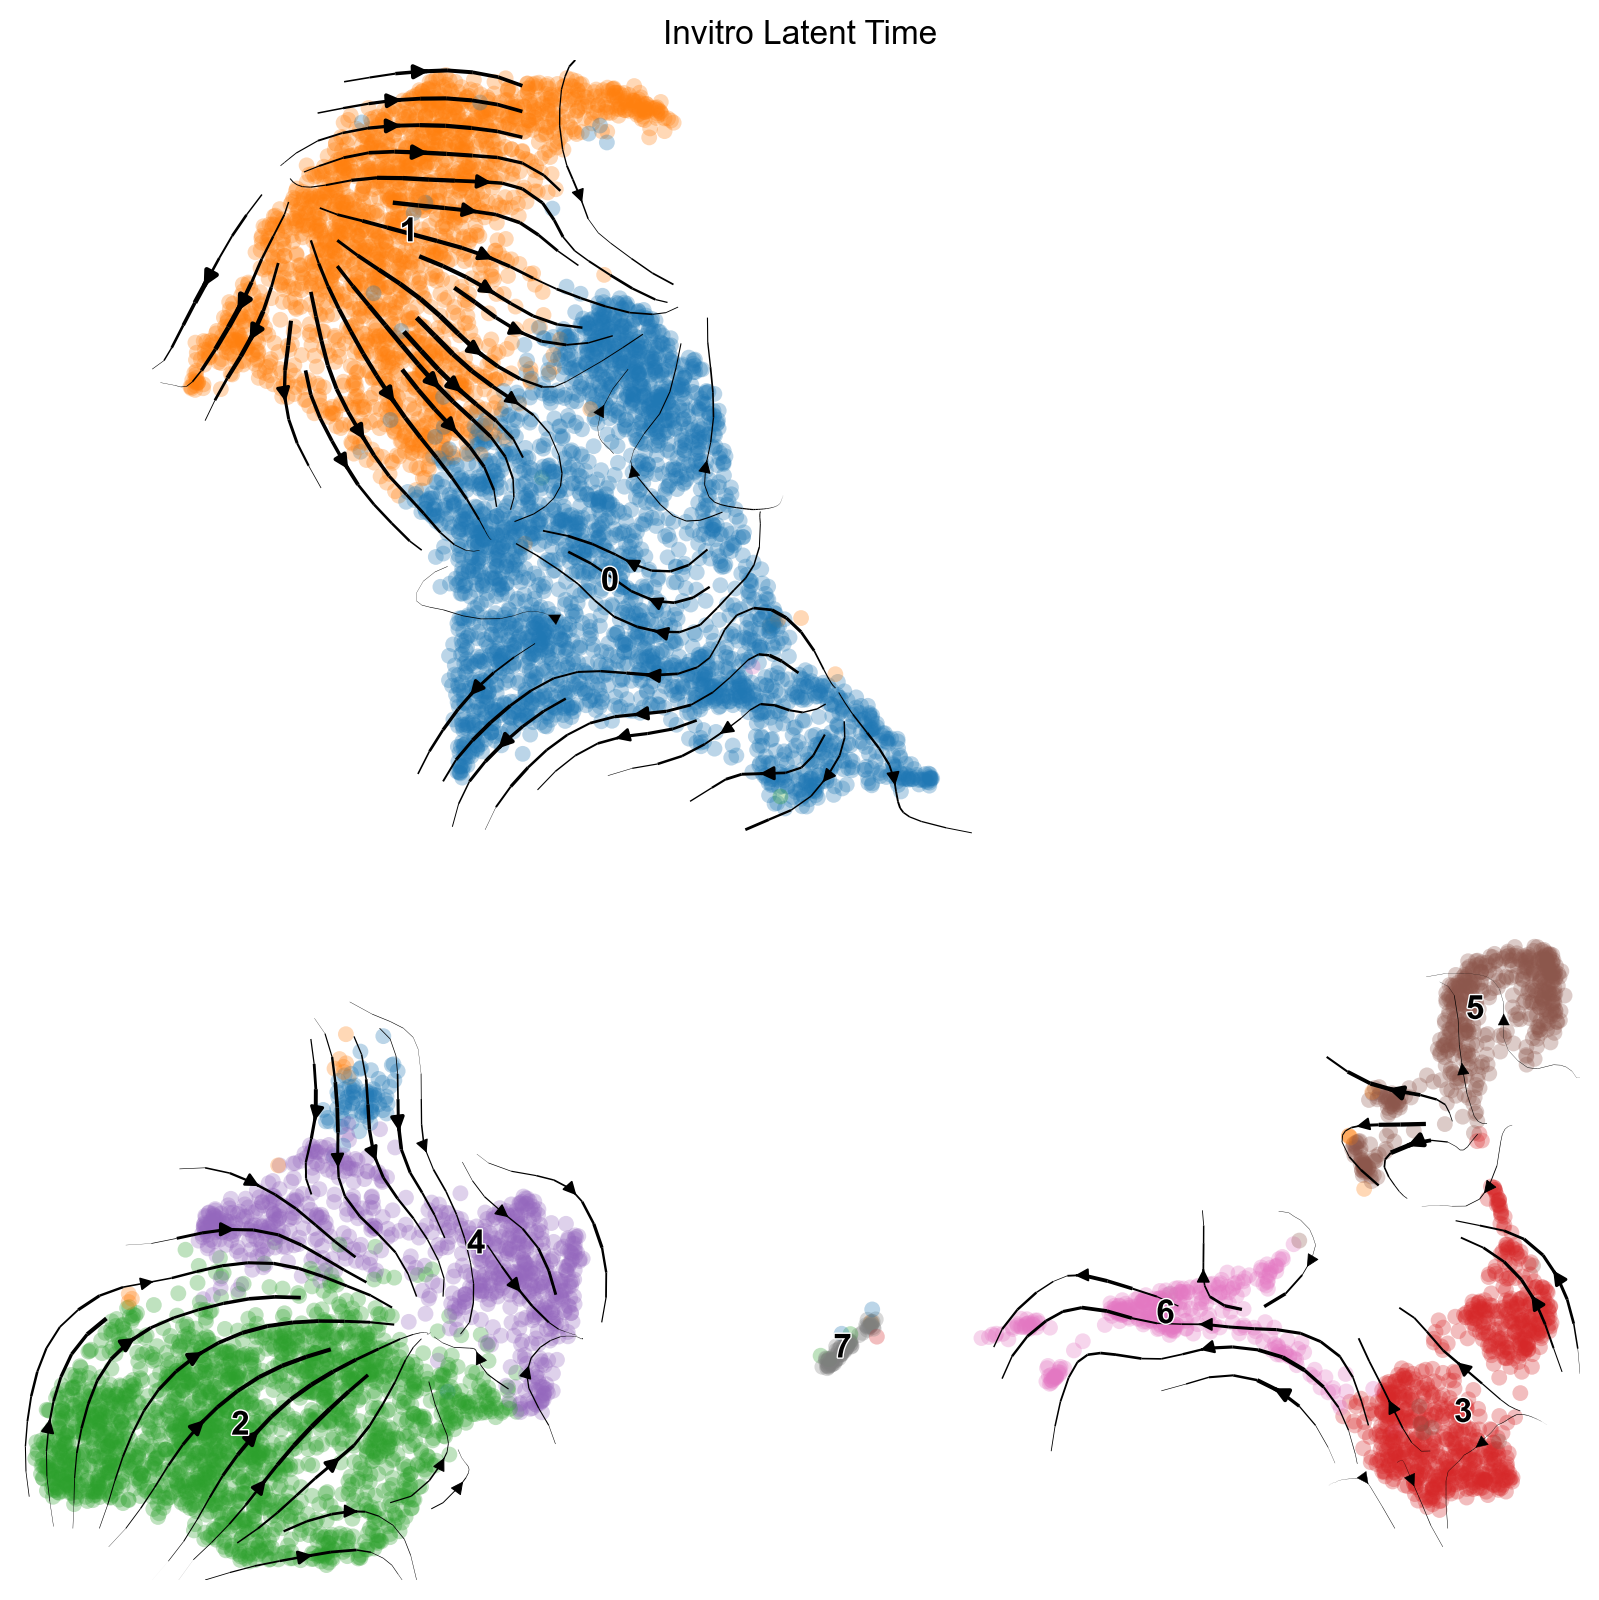

In [80]:
scv.pl.velocity_embedding_stream(invitro2,color='x', title='Invitro Latent Time',save='/Users/fayzan/PycharmProjects/Betel/scVelo-umap-clustermorevar.png')

saving figure to file /Users/fayzan/PycharmProjects/Betel/scVelo-umap-genes.png


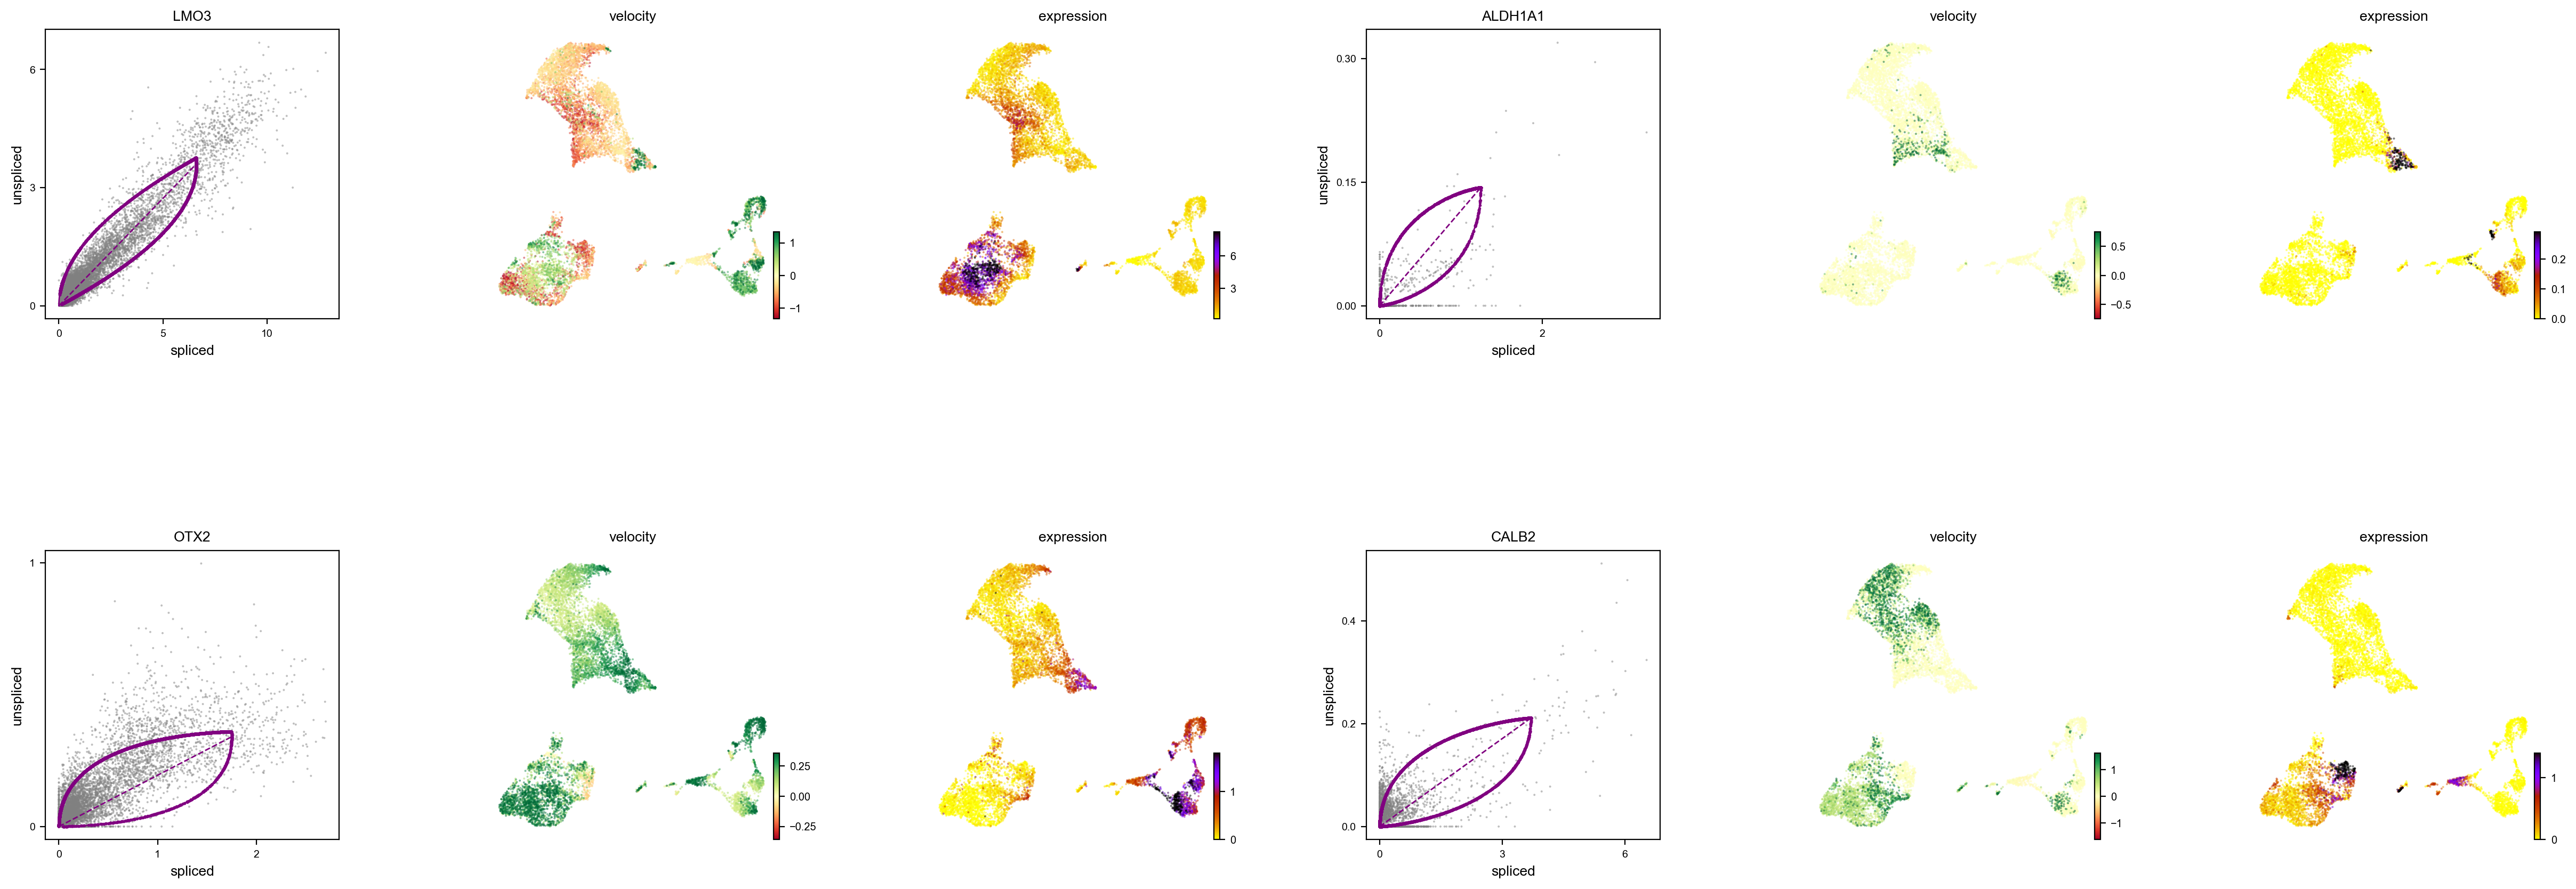

In [35]:
#Calculate pseudogene modules
scv.pl.velocity(invitro2, ['LMO3',  'ALDH1A1', 'OTX2', 'CALB2'], ncols=2, save='/Users/fayzan/PycharmProjects/Betel/scVelo-umap-genes.png')

In [7]:
scv.tl.rank_velocity_genes(invitro2, groupby='x', min_corr=.15)

df = scv.DataFrame(invitro2.uns['rank_velocity_genes']['names'])
df.head(100)

NameError: name 'scv' is not defined

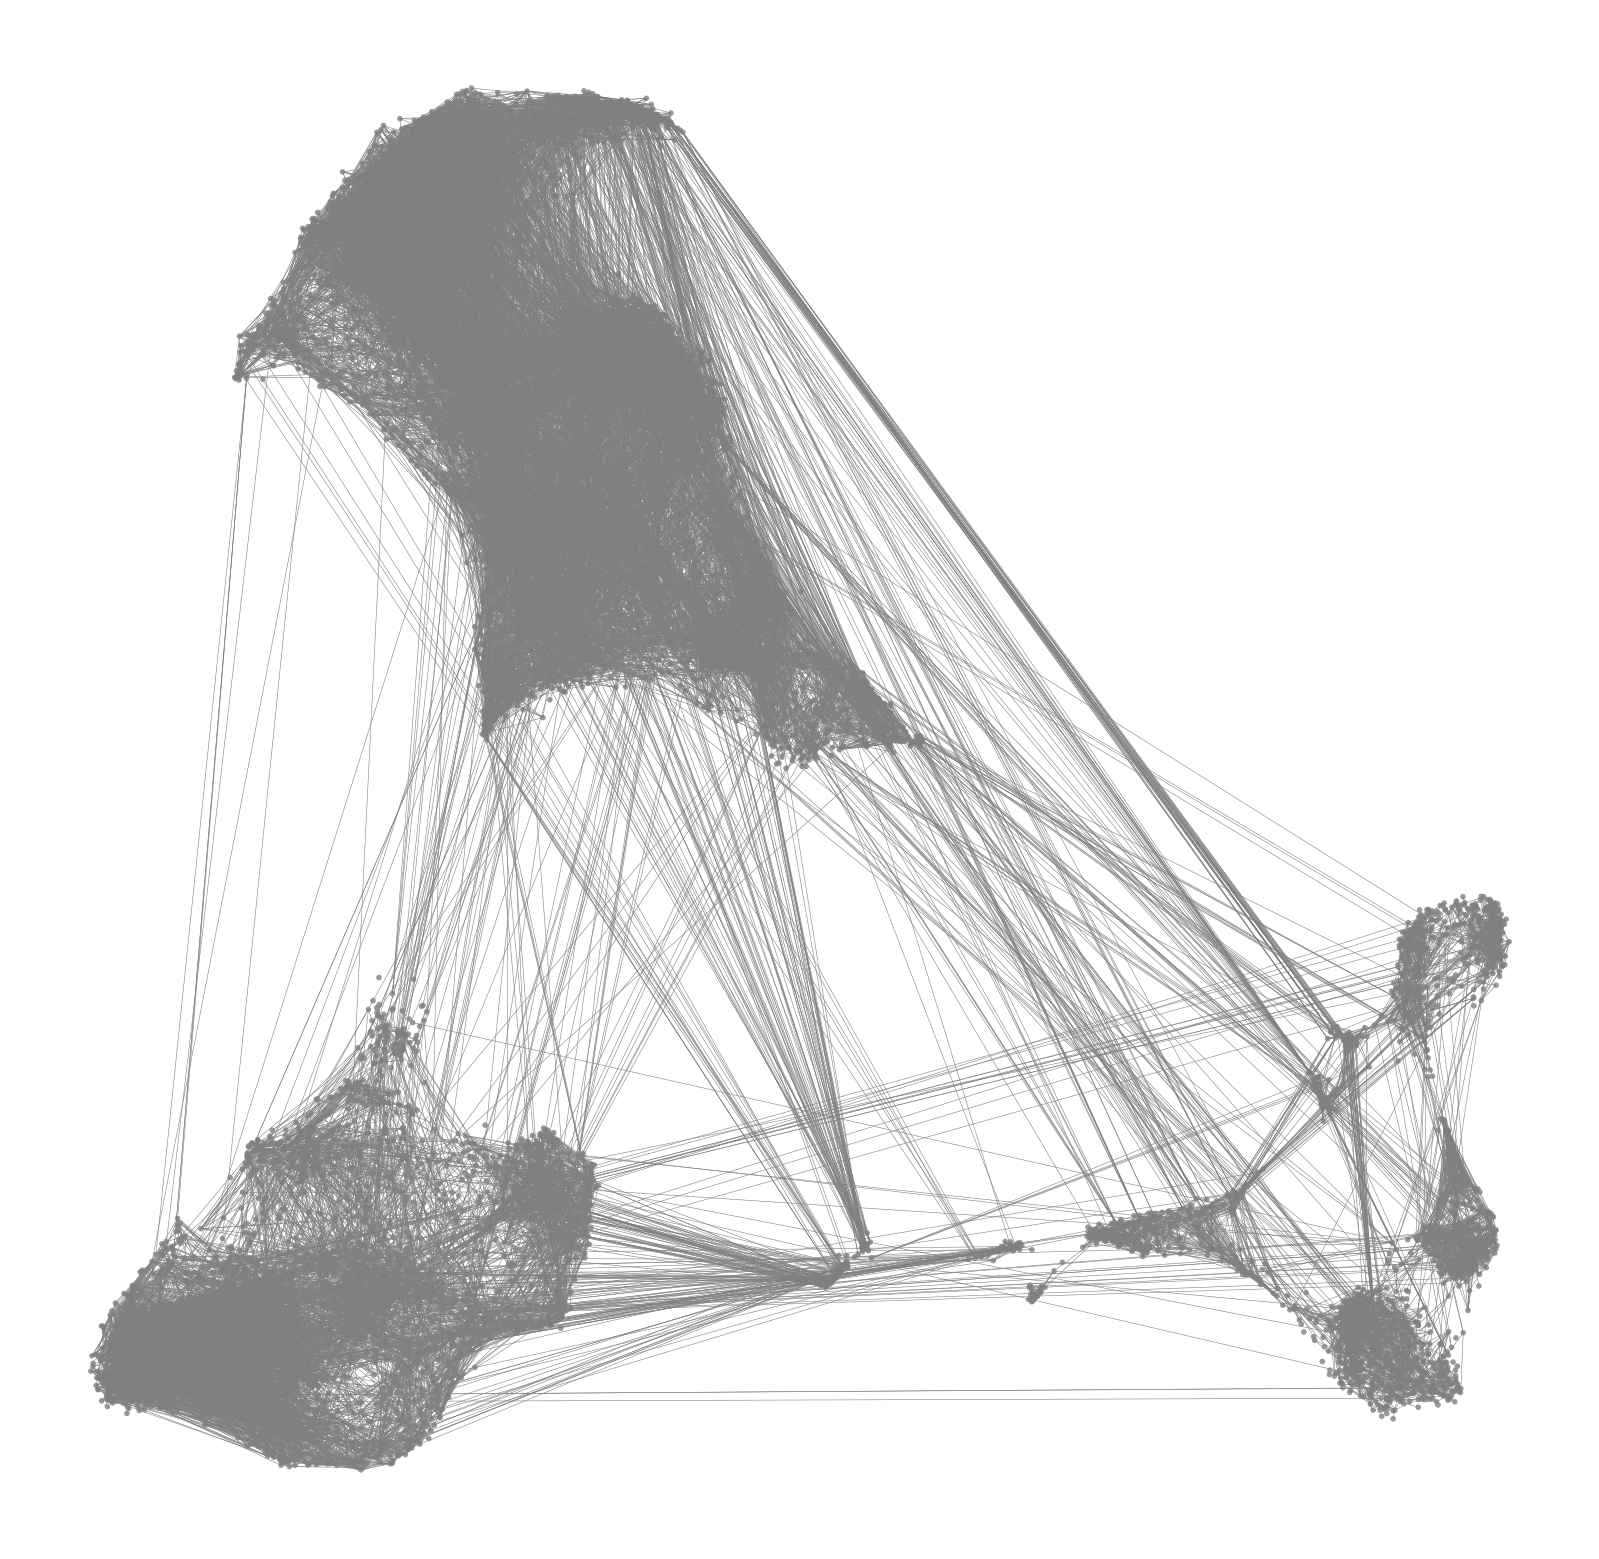

In [37]:
scv.pl.velocity_graph(invitro2, threshold=.1)

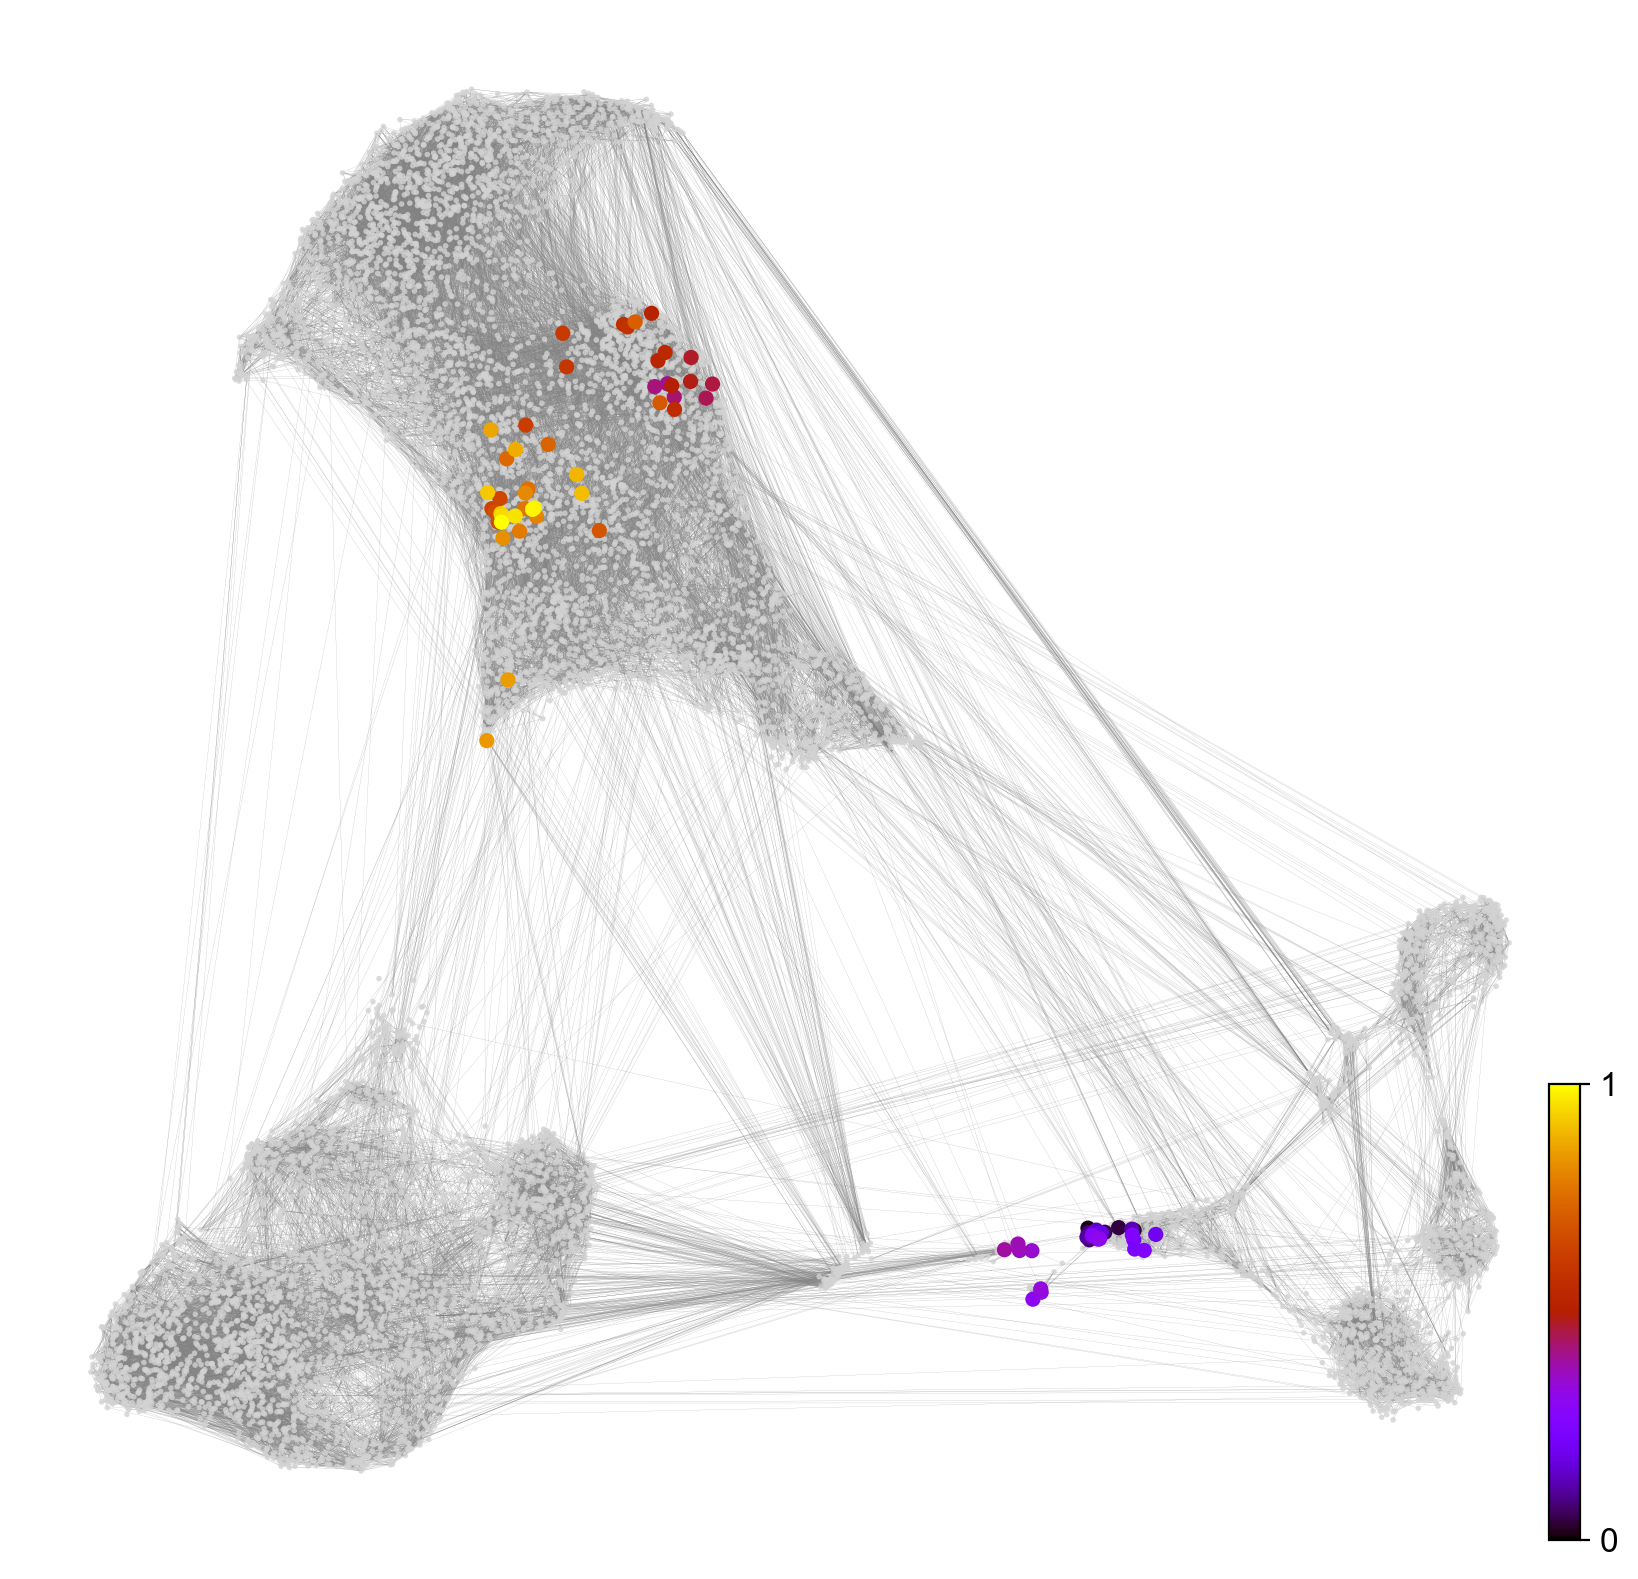

In [46]:
x, y = scv.utils.get_cell_transitions(invitro2, basis='umap', starting_cell=80)
ax = scv.pl.velocity_graph(invitro2, c='lightgrey', edge_width=.05, show=False)
ax = scv.pl.scatter(invitro2, x=x, y=y, s=120, c='ascending', cmap='gnuplot', ax=ax)


In [40]:
#anndata.AnnData.write(invitro2, "Invitro.h5ad")

In [48]:
scv.tl.rank_dynamical_genes(invitro2, groupby='x')
df = scv.get_df(invitro2, 'rank_dynamical_genes/names')
df.head(5)

ranking genes by cluster-specific likelihoods
    finished (0:00:05) --> added 
    'rank_dynamical_genes', sorted scores by group ids (adata.uns)


0       1       2      3       4       5        6        7
0     DCX  CTNNA2    MAPT    MDK   BASP1   CENPK      MDK  ZC2HC1A
1   DCLK1    ANK3   DCLK1   YAP1  RBFOX1   TOP2A      DCX    BASP1
2  CTNNA2   DCLK1  RBFOX1  CENPK     DCX    NUF2     SYT1    NOVA1
3   GAP43    MAPT   KIF5C   RPS3    MAPT     MDK  ZC2HC1A      FYN
4   KIF5C   GAP43  CTNNA2  TOP2A   GAP43  NUSAP1     EBF1  ZNF385D

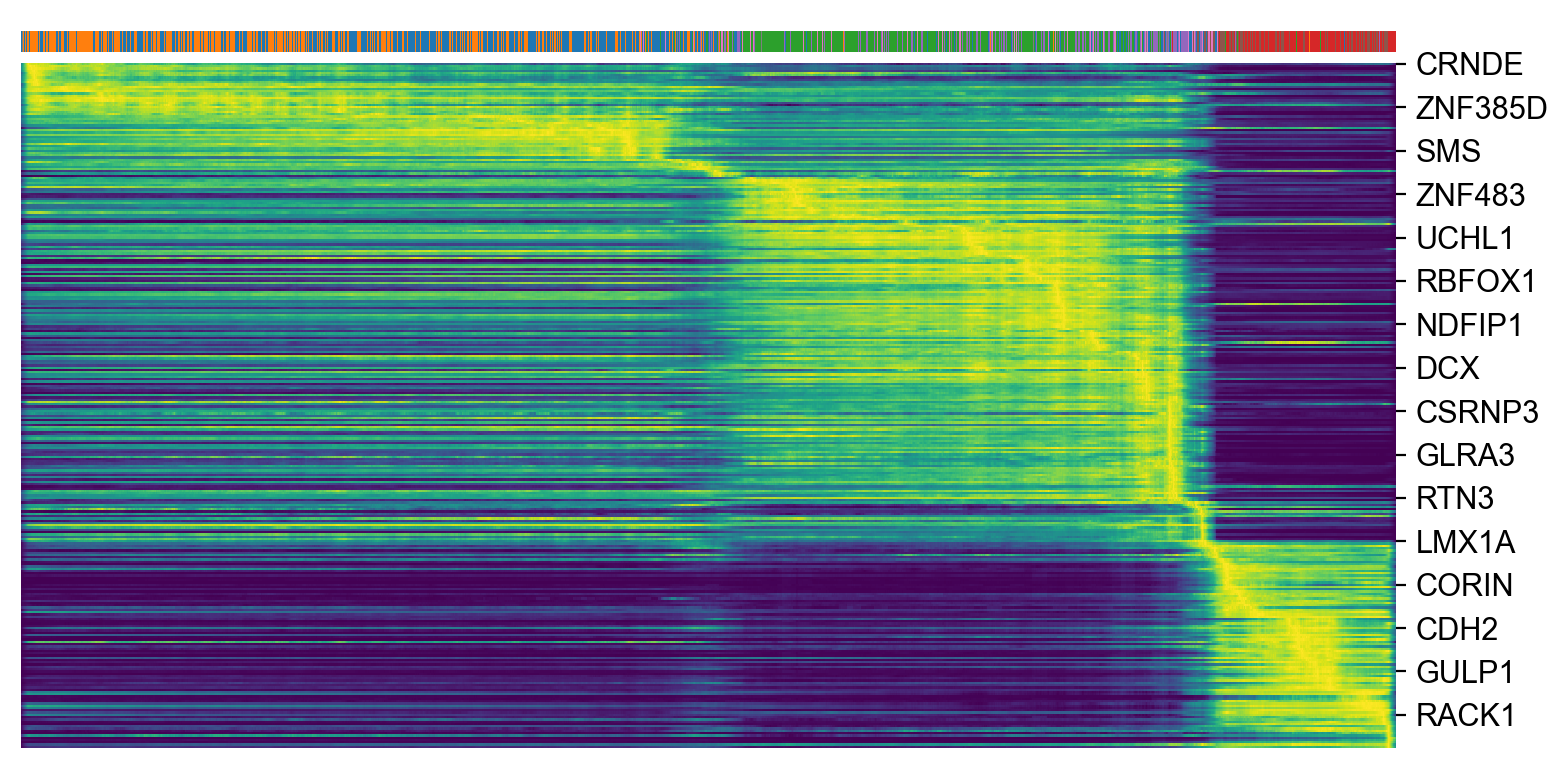

In [74]:
top_genes = invitro2.var['fit_likelihood'].sort_values(ascending=False).index[:300]
scv.pl.heatmap(invitro2, var_names=top_genes, sortby='latent_time', col_color='x', n_convolve=100)



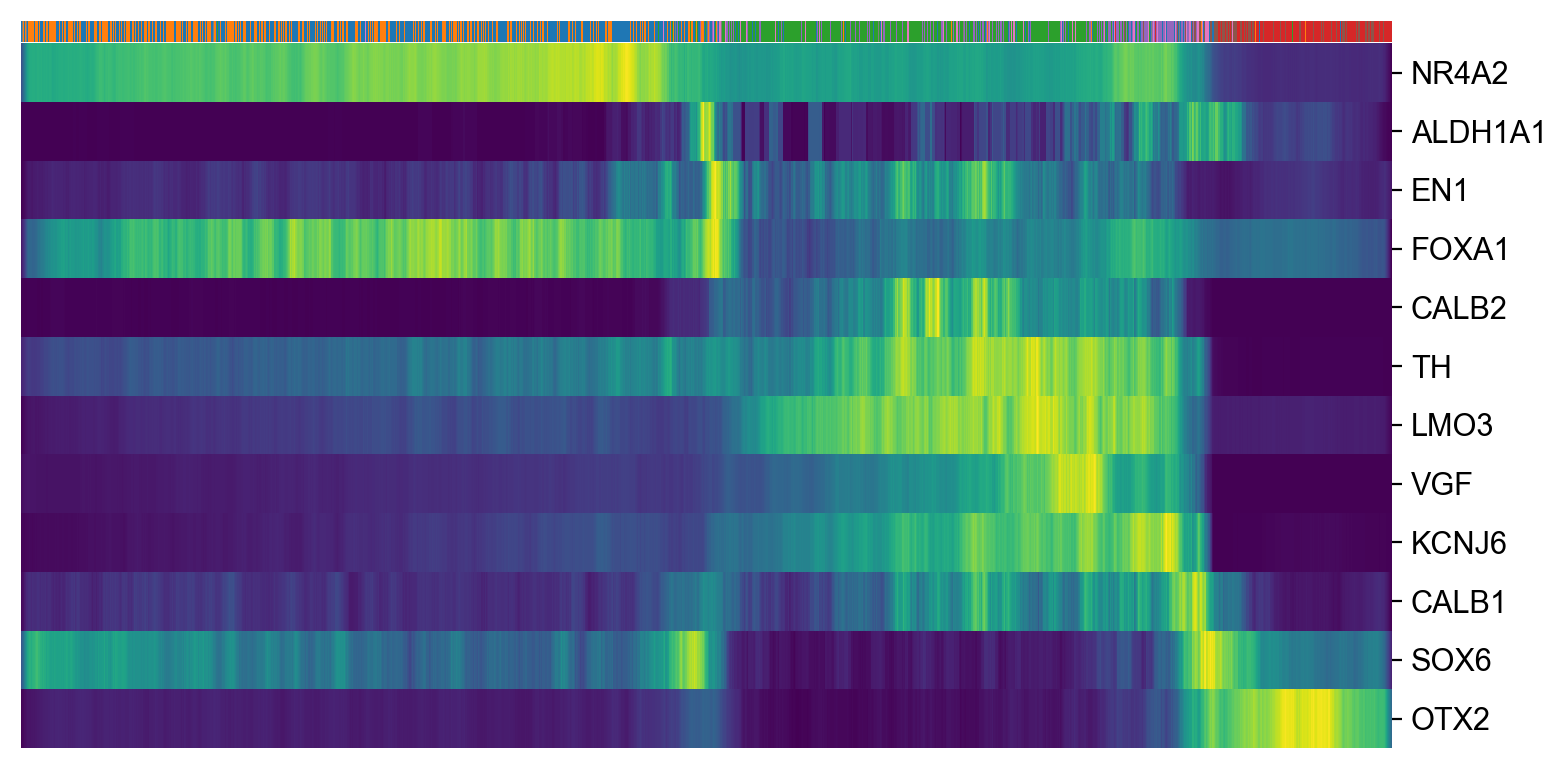

In [76]:
scv.pl.heatmap(invitro2, var_names=["ALDH1A1", "LMO3", "KCNJ6", "AGTR1", "EN1", "TH", "NR4A2", "FOXA1","SOX6", "SOX5", "VGF", "CALB1", "CALB2", "OTX2"], sortby='latent_time', col_color='x', n_convolve=100, colorbar=True, sort=True)


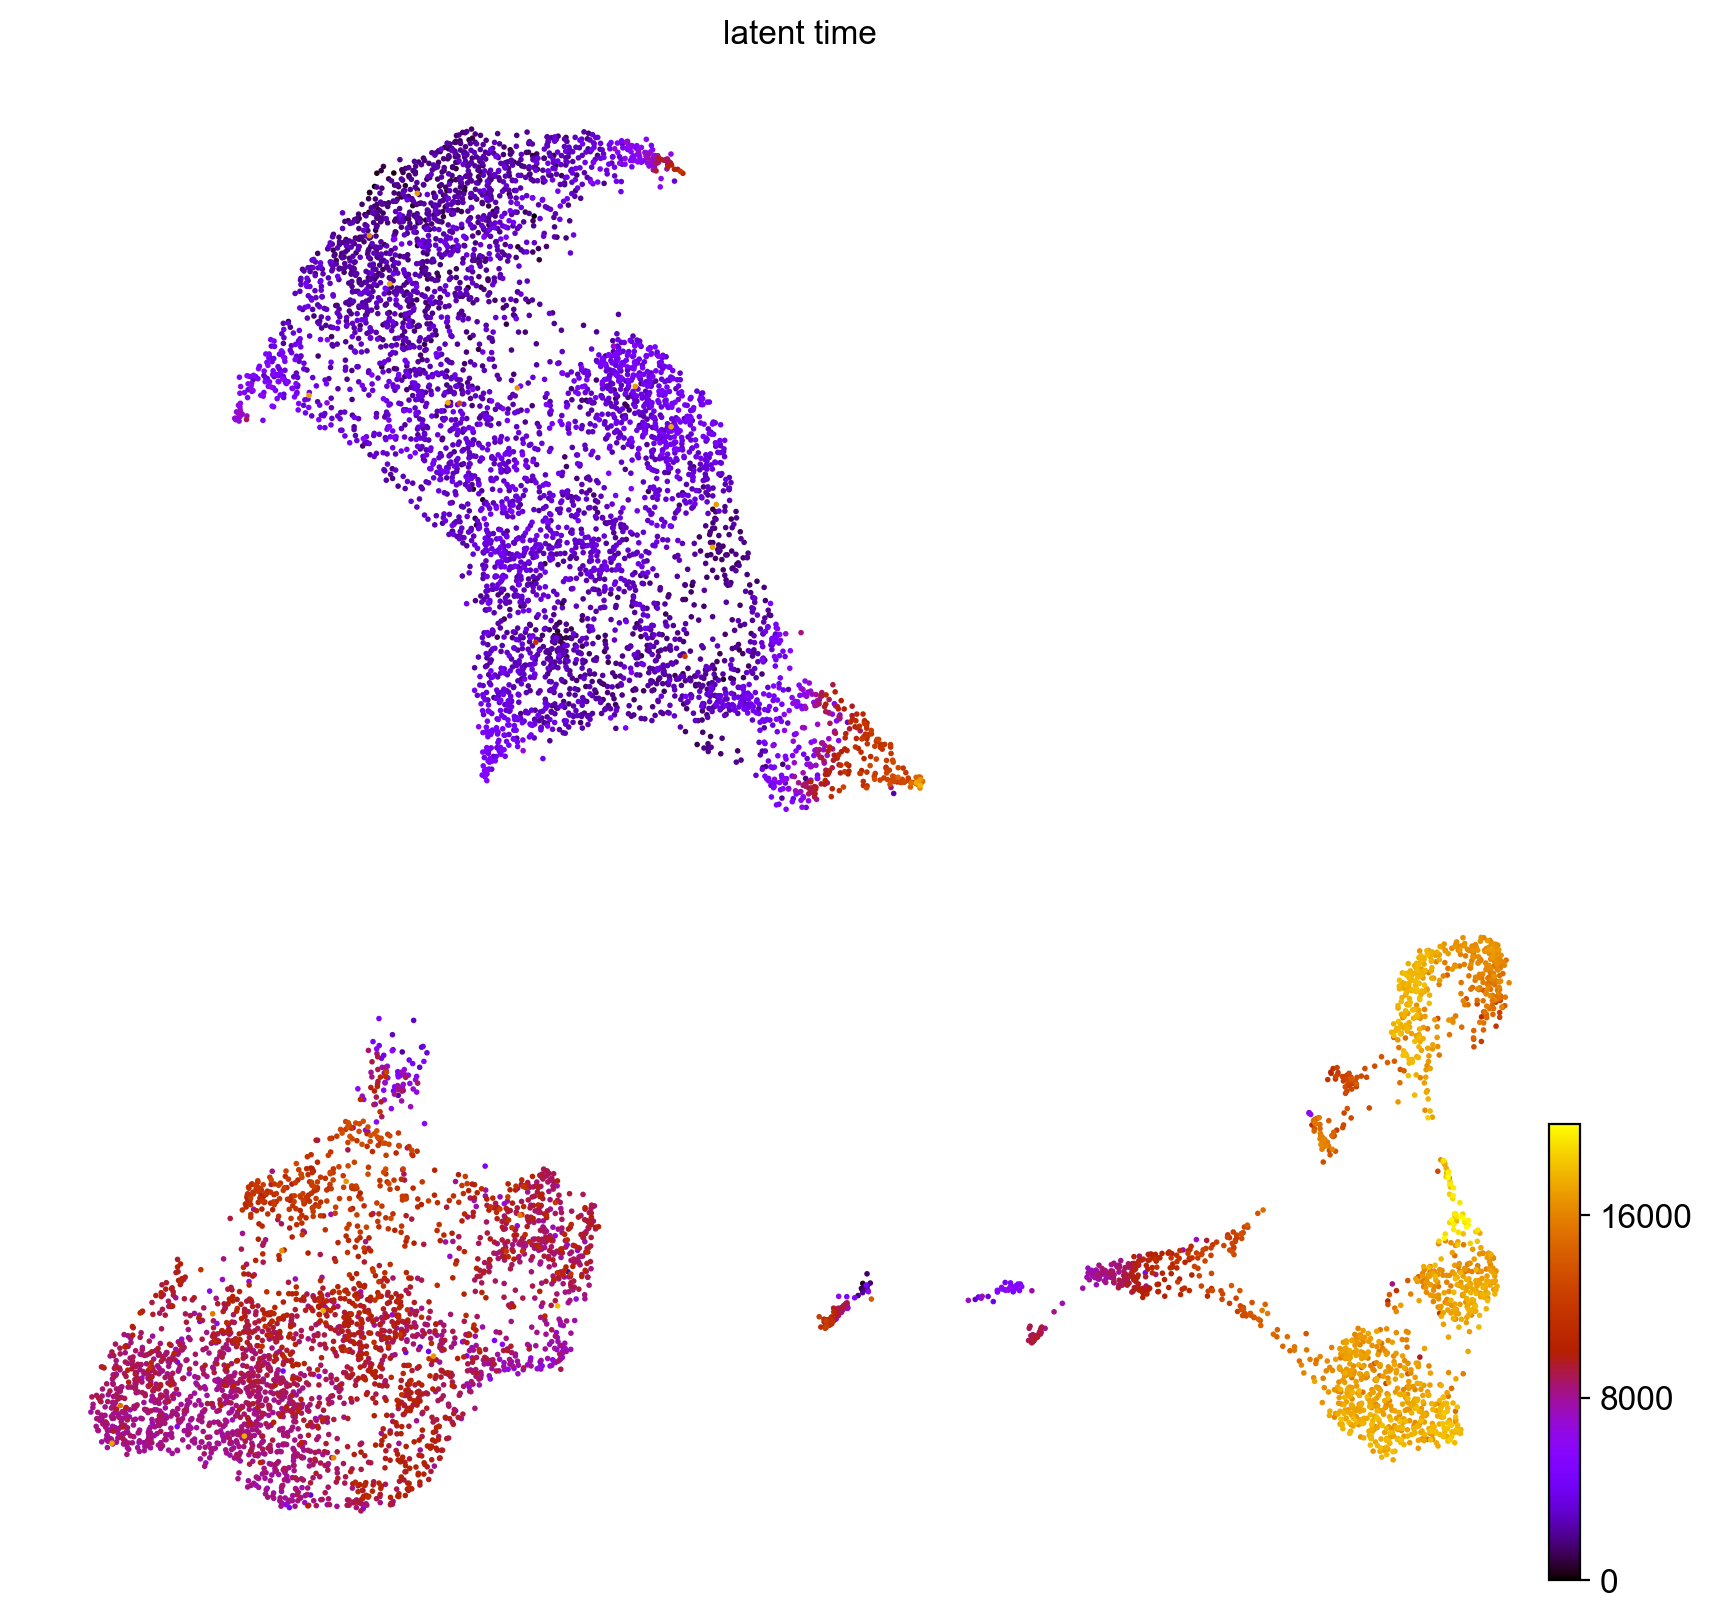

In [81]:
scv.tl.velocity_pseudotime(invitro2)
scv.pl.scatter(invitro2, color='latent_time', cmap='gnuplot')



NameError: name 'invitro2' is not defined